In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import random
import os
os.environ['R_HOME'] = 'C:\Programming\R\R-4.4.2'

In [6]:
# 재현성 난수 고정
SEED = 100

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(SEED)
np.random.seed(SEED)

In [7]:
# data load
df_name = 'freesolv'
df = pd.read_csv('C:\Programming\Github\EGCN\data\\' + df_name + '.csv')

smiles_list = df['smiles'].tolist()

# target 정의
target = df.iloc[:,-1]

print(smiles_list[:5])
print(target[:5])

['CN(C)C(=O)c1ccc(cc1)OC', 'CS(=O)(=O)Cl', 'CC(C)C=C', 'CCc1cnccn1', 'CCCCCCCO']
0   -11.01
1    -4.87
2     1.83
3    -5.45
4    -4.21
Name: freesolv, dtype: float64


In [8]:
# 분자 특성 추출 class
class MolecularFeatureExtractor:
    def __init__(self):
        self.descriptors = [desc[0] for desc in Descriptors._descList]

    def extract_molecular_features(self, smiles_list):
        features_dict = {desc: [] for desc in self.descriptors}

        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                for descriptor_name in self.descriptors:
                    descriptor_function = getattr(Descriptors, descriptor_name)
                    try:
                        features_dict[descriptor_name].append(descriptor_function(mol))
                    except:
                        features_dict[descriptor_name].append(None)
            else:
                for descriptor_name in self.descriptors:
                    features_dict[descriptor_name].append(None)

        return pd.DataFrame(features_dict)

In [9]:
# 분자 특성 추출 및 데이터프레임 정의
extractor = MolecularFeatureExtractor()
df_all_features = extractor.extract_molecular_features(smiles_list)

df_all_features['target'] = target
df_all_features.head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       11.429183        0.002457          11.429183           0.002457   
1        9.397377       -3.194444           9.397377           0.925154   
2        3.560185        0.648148           3.560185           0.648148   
3        4.034722        0.966111           4.034722           0.966111   
4        8.365587        0.364796           8.365587           0.364796   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.686360  179.219         166.115  179.094629                   70   
1  0.421427  114.553         111.529  113.954228                   32   
2  0.412737   70.135          60.055   70.078250                   30   
3  0.536795  108.144         100.080  108.068748                   42   
4  0.544191  116.204         100.076  116.120115                   50   

   NumRadicalElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                    0  ...             0           0                  0   
1                    0  ...             0           0                  0   
2                    0  ...             0           0                  0   
3                    0  ...             0           0                  0   
4                    0  ...             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0             0            0            0             0                 0   
1             0            0            0             0                 0   
2             0            0            0             0                 0   
3             0            0            0             0                 0   
4             0            0            0             0                 3   

   fr_urea  target  
0        0  -11.01  
1        0   -4.87  
2        0    1.83  
3        0   -5.45  
4        0   -4.21  

[5 rows x 209 columns]

In [10]:
num_all_features = df_all_features.shape[1] - 1  # logvp 열 제외
print("초기 변수 개수:", num_all_features)

초기 변수 개수: 208


# 1. NA Handling

In [11]:
# NA 확인
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_all_features[df_all_features.isna().any(axis = 1)]

Empty DataFrame
Columns: [MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9, TPSA, EState_VSA1, EState_VSA10, EState_VSA11, EState_VSA2, EState_VSA3, EState_VSA4, EState_VSA5, EState_VSA6, EState_VSA7, EState_VSA8, EState_VSA9, VSA_EState1, VSA_EState10, VSA_EState2, VSA_EState3, VSA_EState4, VSA_EState5, VSA_EState6, ...]
Index: []

In [12]:
# 결측치가 포함된 feature 개수
print('결측치가 포함된 열 개수:', df_all_features.isna().any(axis = 0).sum(), '\n')
print(df_all_features.isna().any(axis = 0))

결측치가 포함된 열 개수: 0 

MaxEStateIndex              False
MinEStateIndex              False
MaxAbsEStateIndex           False
MinAbsEStateIndex           False
qed                         False
MolWt                       False
HeavyAtomMolWt              False
ExactMolWt                  False
NumValenceElectrons         False
NumRadicalElectrons         False
MaxPartialCharge            False
MinPartialCharge            False
MaxAbsPartialCharge         False
MinAbsPartialCharge         False
FpDensityMorgan1            False
FpDensityMorgan2            False
FpDensityMorgan3            False
BCUT2D_MWHI                 False
BCUT2D_MWLOW                False
BCUT2D_CHGHI                False
BCUT2D_CHGLO                False
BCUT2D_LOGPHI               False
BCUT2D_LOGPLOW              False
BCUT2D_MRHI                 False
BCUT2D_MRLOW                False
BalabanJ                    False
BertzCT                     False
Chi0                        False
Chi0n                       F

In [13]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [14]:
# 결측치가 포함된 feature 제거
df_removed_features = df_all_features.dropna(axis = 1)
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features)

제거 후 남은 feature 개수: 208


In [15]:
# 결측치가 제거된 data frame
df_removed_features

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0         11.429183        0.002457          11.429183           0.002457   
1          9.397377       -3.194444           9.397377           0.925154   
2          3.560185        0.648148           3.560185           0.648148   
3          4.034722        0.966111           4.034722           0.966111   
4          8.365587        0.364796           8.365587           0.364796   
..              ...             ...                ...                ...   
637       10.622272       -0.081946          10.622272           0.081946   
638        3.222222        1.250000           3.222222           1.250000   
639       10.036149        0.181111          10.036149           0.181111   
640        5.480456        0.837018           5.480456           0.837018   
641        4.944444        0.777778           4.944444           0.777778   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0    0.686360  179.219         166.115  179.094629                   70   
1    0.421427  114.553         111.529  113.954228                   32   
2    0.412737   70.135          60.055   70.078250                   30   
3    0.536795  108.144         100.080  108.068748                   42   
4    0.544191  116.204         100.076  116.120115                   50   
..        ...      ...             ...         ...                  ...   
637  0.438315  158.241         140.097  158.130680                   66   
638  0.434794   71.123          62.051   71.073499                   30   
639  0.568137  122.123         116.075  122.036779                   46   
640  0.400312  134.650         119.530  134.086228                   50   
641  0.415749   88.106          80.042   88.052429                   36   

     NumRadicalElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                      0  ...             0           0                  0   
1                      0  ...             0           0                  0   
2                      0  ...             0           0                  0   
3                      0  ...             0           0                  0   
4                      0  ...             0           0                  0   
..                   ...  ...           ...         ...                ...   
637                    0  ...             0           0                  0   
638                    0  ...             0           0                  0   
639                    0  ...             0           0                  0   
640                    0  ...             0           0                  0   
641                    0  ...             0           0                  0   

     fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0               0            0            0             0                 0   
1               0            0            0             0                 0   
2               0            0            0             0                 0   
3               0            0            0             0                 0   
4               0            0            0             0                 3   
..            ...          ...          ...           ...               ...   
637             0            0            0             0                 3   
638             0            0            0             0                 0   
639             0            0            0             0                 0   
640             0            0            0             0                 3   
641             0            0            0             0                 0   

     fr_urea  target  
0          0  -11.01  
1          0   -4.87  
2          0    1.83  
3          0   -5.45  
4          0   -4.21  
..       ...     ...  
637        0   -2.04  
638        0   -5.48  
639        0   -8.83  
640        0    0.29  
641        0   -5.06  

[642 rows x 209 

# 2. nunique == 1 인 경우

In [16]:
unique_columns = list(df_removed_features.loc[:, df_removed_features.nunique() == 1].columns)
print('nunique == 1인 feature : \n', unique_columns, '\n')

# nunique == 1인 feature 제거
#df_removed_features.drop(columns = unique_columns, inplace = True)
df_removed_features = df_removed_features.drop(columns = unique_columns).copy()

num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)


nunique == 1인 feature : 
 ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_N_O', 'fr_alkyl_carbamate', 'fr_amidine', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_furan', 'fr_guanido', 'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_lactone', 'fr_nitroso', 'fr_oxazole', 'fr_prisulfonamd', 'fr_quatN', 'fr_sulfonamd', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan'] 

제거 후 남은 feature 개수: 177 

(642, 178)


In [17]:
df_removed_features

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0         11.429183        0.002457          11.429183           0.002457   
1          9.397377       -3.194444           9.397377           0.925154   
2          3.560185        0.648148           3.560185           0.648148   
3          4.034722        0.966111           4.034722           0.966111   
4          8.365587        0.364796           8.365587           0.364796   
..              ...             ...                ...                ...   
637       10.622272       -0.081946          10.622272           0.081946   
638        3.222222        1.250000           3.222222           1.250000   
639       10.036149        0.181111          10.036149           0.181111   
640        5.480456        0.837018           5.480456           0.837018   
641        4.944444        0.777778           4.944444           0.777778   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0    0.686360  179.219         166.115  179.094629                   70   
1    0.421427  114.553         111.529  113.954228                   32   
2    0.412737   70.135          60.055   70.078250                   30   
3    0.536795  108.144         100.080  108.068748                   42   
4    0.544191  116.204         100.076  116.120115                   50   
..        ...      ...             ...         ...                  ...   
637  0.438315  158.241         140.097  158.130680                   66   
638  0.434794   71.123          62.051   71.073499                   30   
639  0.568137  122.123         116.075  122.036779                   46   
640  0.400312  134.650         119.530  134.086228                   50   
641  0.415749   88.106          80.042   88.052429                   36   

     MaxPartialCharge  ...  fr_piperzine  fr_priamide  fr_pyridine  \
0            0.252836  ...             0            0            0   
1            0.229212  ...             0            0            0   
2           -0.029310  ...             0            0            0   
3            0.058343  ...             0            0            0   
4            0.043052  ...             0            0            0   
..                ...  ...           ...          ...          ...   
637          0.305002  ...             0            0            0   
638         -0.004845  ...             0            0            0   
639          0.149553  ...             0            0            0   
640          0.022296  ...             0            0            0   
641          0.070114  ...             0            0            0   

     fr_sulfide  fr_sulfone  fr_term_acetylene  fr_thiophene  \
0             0           0                  0             0   
1             0           0                  0             0   
2             0           0                  0             0   
3             0           0                  0             0   
4             0           0                  0             0   
..          ...         ...                ...           ...   
637           0           0                  0             0   
638           0           0                  0             0   
639           0           0                  0             0   
640           0           0                  0             0   
641           0           0                  0             0   

     fr_unbrch_alkane  fr_urea  target  
0                   0        0  -11.01  
1                   0        0   -4.87  
2                   0        0    1.83  
3                   0        0   -5.45  
4                   3        0   -4.21  
..                ...      ...     ...  
637                 3        0   -2.04  
638                 0        0   -5.48  
639                 0        0   -8.83  
640                 3        0    0.29  
641                 0        0   -5.06  

[642 rows x 178 columns]

# 3. 너무 낮은 variance를 가지는 경우

In [18]:
low_variances = sorted(df_removed_features.var())
low_variances[:10]

[0.001557632398753894,
 0.0015576323987538943,
 0.0015576323987538943,
 0.0015576323987538943,
 0.003110404790023377,
 0.003110404790023377,
 0.003110404790023377,
 0.003110404790023377,
 0.004658317173808447,
 0.004658317173808447]

In [19]:
columns_low_variances = []

for i in low_variances:
    if i < 0.001:
        column = df_removed_features.loc[:, df_removed_features.var() == i].columns
        columns_low_variances.append(column)
columns_low_variances = [item for index in columns_low_variances for item in index]

# 2. 중복 제거 및 유니크 값 추출
columns_low_variances = list(set(columns_low_variances))
print(columns_low_variances)

[]


In [20]:
# 낮은 분산의 변수 제거
df_removed_features = df_removed_features.drop(columns = columns_low_variances).copy()
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)

제거 후 남은 feature 개수: 177 

(642, 178)


In [21]:
df_removed_features

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0         11.429183        0.002457          11.429183           0.002457   
1          9.397377       -3.194444           9.397377           0.925154   
2          3.560185        0.648148           3.560185           0.648148   
3          4.034722        0.966111           4.034722           0.966111   
4          8.365587        0.364796           8.365587           0.364796   
..              ...             ...                ...                ...   
637       10.622272       -0.081946          10.622272           0.081946   
638        3.222222        1.250000           3.222222           1.250000   
639       10.036149        0.181111          10.036149           0.181111   
640        5.480456        0.837018           5.480456           0.837018   
641        4.944444        0.777778           4.944444           0.777778   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0    0.686360  179.219         166.115  179.094629                   70   
1    0.421427  114.553         111.529  113.954228                   32   
2    0.412737   70.135          60.055   70.078250                   30   
3    0.536795  108.144         100.080  108.068748                   42   
4    0.544191  116.204         100.076  116.120115                   50   
..        ...      ...             ...         ...                  ...   
637  0.438315  158.241         140.097  158.130680                   66   
638  0.434794   71.123          62.051   71.073499                   30   
639  0.568137  122.123         116.075  122.036779                   46   
640  0.400312  134.650         119.530  134.086228                   50   
641  0.415749   88.106          80.042   88.052429                   36   

     MaxPartialCharge  ...  fr_piperzine  fr_priamide  fr_pyridine  \
0            0.252836  ...             0            0            0   
1            0.229212  ...             0            0            0   
2           -0.029310  ...             0            0            0   
3            0.058343  ...             0            0            0   
4            0.043052  ...             0            0            0   
..                ...  ...           ...          ...          ...   
637          0.305002  ...             0            0            0   
638         -0.004845  ...             0            0            0   
639          0.149553  ...             0            0            0   
640          0.022296  ...             0            0            0   
641          0.070114  ...             0            0            0   

     fr_sulfide  fr_sulfone  fr_term_acetylene  fr_thiophene  \
0             0           0                  0             0   
1             0           0                  0             0   
2             0           0                  0             0   
3             0           0                  0             0   
4             0           0                  0             0   
..          ...         ...                ...           ...   
637           0           0                  0             0   
638           0           0                  0             0   
639           0           0                  0             0   
640           0           0                  0             0   
641           0           0                  0             0   

     fr_unbrch_alkane  fr_urea  target  
0                   0        0  -11.01  
1                   0        0   -4.87  
2                   0        0    1.83  
3                   0        0   -5.45  
4                   3        0   -4.21  
..                ...      ...     ...  
637                 3        0   -2.04  
638                 0        0   -5.48  
639                 0        0   -8.83  
640                 3        0    0.29  
641                 0        0   -5.06  

[642 rows x 178 columns]

# 4. 데이터 스크리닝 (ISIS)

In [22]:
X_train = df_removed_features.drop(columns = 'target')
y_train = df_removed_features['target']

print(X_train.shape)
print(y_train.shape)

(642, 177)
(642,)


In [23]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
print(X_train_scaling.shape)

(642, 177)


In [24]:
# Python to R type
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
from rpy2.robjects import FloatVector

pandas2ri.activate()

X_train_scaling = r['as.matrix'](X_train_scaling)

y_train = FloatVector(y_train)

nfolds = 10
nfolds = FloatVector([nfolds])[0]

nsis = 100
nsis = FloatVector([nsis])[0]

seed = 9
seed = FloatVector([seed])[0]

In [25]:
from rpy2.robjects.packages import importr
import sys
import io

SIS = importr('SIS')

# R 출력이 발생할 때 UTF-8 오류를 방지하기 위해, 표준 출력을 임시로 바꿔서 처리할 수 있습니다.
#r('Sys.setlocale("LC_ALL", "C.UTF-8")')

# model1 = SIS(...)
model1 = SIS.SIS(X_train_scaling,y_train,
    family="gaussian",
#    penalty="MCP",
    tune="cv",
    nfolds=nfolds,
    nsis=nsis,
    varISIS="aggr",
    seed=seed,
    q = 0.95,
    standardize=False)


Iter 1 , screening:  1 3 4 5 9 10 11 12 13 16 22 24 26 27 30 39 44 45 46 51 52 55 57 59 62 64 65 66 68 72 75 79 80 82 86 88 92 93 98 100 101 102 103 108 109 110 111 112 117 118 121 122 125 126 130 132 133 142 
Iter 1 , selection:  1 11 46 57 59 62 64 68 72 79 82 88 92 98 108 109 111 121 126 132 133 142 
Iter 1 , conditional-screening:  3 12 13 26 28 31 32 33 34 35 36 38 40 49 54 55 56 61 66 67 73 80 81 96 100 101 103 107 110 113 115 116 117 120 130 131 136 141 143 144 145 150 152 153 155 163 167 172 
Iter 2 , screening:  1 3 11 12 13 26 28 31 32 33 34 35 36 38 40 46 49 54 55 56 57 59 61 62 64 66 67 68 72 73 79 80 81 82 88 92 96 98 100 101 103 107 108 109 110 111 113 115 116 117 120 121 126 130 131 132 133 136 141 142 143 144 145 150 152 153 155 163 167 172 
Iter 2 , selection:  1 11 34 40 46 54 56 57 59 61 64 68 72 73 79 88 98 100 108 111 115 116 117 120 121 126 132 133 136 142 143 144 152 153 155 163 167 
Iter 2 , conditional-screening:  3 10 12 13 26 28 32 33 36 39 45 62 63 65 66 69 

In [26]:
print(str(model1))

$sis.ix0
 [1]   1   3   4   5   9  10  11  12  13  16  22  24  26  27  30  39  44  45  46
[20]  51  52  55  57  59  62  64  65  66  68  72  75  79  80  82  86  88  92  93
[39]  98 100 101 102 103 108 109 110 111 112 117 118 121 122 125 126 130 132 133
[58] 142

$ix
 [1]   1  11  34  40  42  46  50  51  56  57  61  64  69  72  74  79  86  88  98
[20] 102 108 111 112 115 117 120 121 126 142 144 146 152 153 155 161 163 167

$coef.est
(Intercept)          X1         X11         X34         X40         X42 
-3.80300623 -0.65309109  0.36543501 -0.54476157  0.13849652 -0.02725488 
        X46         X50         X51         X56         X57         X61 
-0.24883054  0.26144938 -0.39667279 -0.21845359 -0.21572538 -0.33044845 
        X64         X69         X72         X74         X79         X86 
 0.81314788  0.51179484 -0.70700384  0.31499339 -0.84303720  0.21219185 
        X88         X98        X102        X108        X111        X112 
-0.18661020  0.35097827 -0.89231111 -0.32464121 -0.330

In [27]:
print(df_removed_features.shape)
print('\n')
print(df_removed_features.columns)

(642, 178)


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_piperzine', 'fr_priamide', 'fr_pyridine', 'fr_sulfide',
       'fr_sulfone', 'fr_term_acetylene', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'target'],
      dtype='object', length=178)


In [28]:
# 선택된 feature들의 index
selected_features_ISIS = np.array(model1.rx2('ix'))

# R은 index가 1부터 시작하므로 python에 맞게 보정
selected_features_ISIS = selected_features_ISIS - 1
selected_features_ISIS

array([  0,  10,  33,  39,  41,  45,  49,  50,  55,  56,  60,  63,  68,
        71,  73,  78,  85,  87,  97, 101, 107, 110, 111, 114, 116, 119,
       120, 125, 141, 143, 145, 151, 152, 154, 160, 162, 166])

In [29]:
df_removed_features_columns = df_removed_features.columns
print(f'ISIS 적용 전 features: {df_removed_features_columns.size}개')
print(df_removed_features_columns, '\n')

selected_features = df_removed_features_columns[selected_features_ISIS]
print(f'ISIS 적용 후 features: {selected_features.size}개')
print(selected_features)

ISIS 적용 전 features: 178개
Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_piperzine', 'fr_priamide', 'fr_pyridine', 'fr_sulfide',
       'fr_sulfone', 'fr_term_acetylene', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'target'],
      dtype='object', length=178) 

ISIS 적용 후 features: 37개
Index(['MaxEStateIndex', 'MinPartialCharge', 'Chi2v', 'Ipc', 'Kappa2',
       'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA7', 'PEOE_VSA8',
       'SMR_VSA2', 'SMR_VSA5', 'SlogP_VSA10', 'SlogP_VSA2', 'SlogP_VSA4',
       'TPSA', 'EState_VSA6', 'EState_VSA8', 'VSA_EState8', 'NHOHCount',
       'NumAromaticHeterocycles', 'NumHDonors', 'NumHeteroatoms',
       'NumSaturatedHeterocycles', 'RingCount', 'fr_Al_COO', 'fr_Al_OH',
       'fr_Ar_NH', 'fr_amide', 'fr_aryl_methyl', 'fr_bicyclic', 'fr_imidazole',
       'fr_imide', 'fr_ketone

In [30]:
df_ISIS = df_removed_features[list(selected_features) + ['target']]
df_ISIS

MaxEStateIndex  MinPartialCharge     Chi2v         Ipc    Kappa2  \
0         11.429183         -0.496768  2.928081  857.684336  3.937360   
1          9.397377         -0.212518  3.726748    3.609640  1.143107   
2          3.560185         -0.102824  1.479719    9.651484  2.007380   
3          4.034722         -0.261224  1.550303   91.367577  2.403302   
4          8.365587         -0.396377  2.137820   61.499612  6.960000   
..              ...               ...       ...         ...       ...   
637       10.622272         -0.468995  2.740346  266.849445  7.575597   
638        3.222222         -0.316731  1.457107   22.886435  1.410312   
639       10.036149         -0.507966  1.709383  129.225339  2.306764   
640        5.480456         -0.126717  2.481160   61.499612  7.290000   
641        4.944444         -0.376668  1.224745   34.399462  2.157217   

     PEOE_VSA10  PEOE_VSA14  PEOE_VSA2  PEOE_VSA7  PEOE_VSA8  ...  fr_amide  \
0      5.749512    0.000000   4.794537  24.265468  19.658795  ...         1   
1      0.000000    0.000000   0.000000   0.000000  10.682389  ...         0   
2      0.000000    0.000000   0.000000   5.917906   0.000000  ...         0   
3      0.000000    0.000000   9.967957   6.420822  18.590531  ...         0   
4      0.000000    0.000000   0.000000   6.420822   6.606882  ...         0   
..          ...         ...        ...        ...        ...  ...       ...   
637    0.000000    5.969305   4.794537   6.420822   6.420822  ...         0   
638    0.000000    0.000000   0.000000  25.931156   0.000000  ...         0   
639   12.035672    0.000000   4.794537  24.265468   5.563451  ...         0   
640    0.000000    0.000000   0.000000   6.420822   5.880003  ...         0   
641    0.000000    0.000000   0.000000   0.000000   0.000000  ...         0   

     fr_aryl_methyl  fr_bicyclic  fr_imidazole  fr_imide  fr_ketone_Topliss  \
0                 0            0             0         0                  0   
1                 0            0             0         0                  0   
2                 0            0             0         0                  0   
3                 1            0             0         0                  0   
4                 0            0             0         0                  0   
..              ...          ...           ...       ...                ...   
637               0            0             0         0                  0   
638               0            0             0         0                  0   
639               0            0             0         0                  0   
640               0            0             0         0                  0   
641               0            0             0         0                  0   

     fr_nitro_arom_nonortho  fr_para_hydroxylation  fr_phos_ester  target  
0                         0                      0              0  -11.01  
1                         0                      0              0   -4.87  
2                         0                      0              0    1.83  
3                         0                      0              0   -5.45  
4                         0                      0              0   -4.21  
..                      ...                    ...            ...     ...  
637                       0                      0              0   -2.04  
638                       0                      0              0   -5.48  
639                       0                      0              0   -8.83  
640                       0                      0              0    0.29  
641                       0                      0              0   -5.06  

[642 rows x 38 columns]

# 5. 엘라스틱 넷

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [32]:
X_ISIS = df_ISIS.drop(columns = ['target'])
y_ISIS = df_ISIS['target']

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X_ISIS, y_ISIS, test_size = 0.2, random_state = SEED)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
X_test_scaling = scaler.transform(X_test)

print(X_train_scaling.shape)
print(X_test_scaling.shape)

(513, 37)
(129, 37)


In [33]:
# ElasticNet 모델과 하이퍼파라미터 범위 설정
elastic_net = ElasticNet(max_iter = 5000)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # 정규화 강도
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # L1과 L2 비율
}

kfold = KFold(n_splits = 5, shuffle = True, random_state = SEED)

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator = elastic_net,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error', # 그리드서치에서는 score가 최대가 되도록 하는 것이 목표라서 그냥 mse로 하면 값이 작을수록 좋아져버리니까 negative
    cv = kfold,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_scaling, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=ElasticNet(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
best_params = grid_search.best_params_
print(best_params)

{'alpha': 0.01, 'l1_ratio': 0.1}


In [35]:
# 최적 하이퍼파라미터로 ElasticNet 모델 생성
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(
    alpha = best_params['alpha'],
    l1_ratio = best_params['l1_ratio'],
    max_iter = 5000,
    fit_intercept=True
)

In [36]:
# 적합
best_elastic_net.fit(X_train_scaling, y_train)

coefficients = best_elastic_net.coef_
coefficients.size

37

In [37]:
# 엘라스틱넷 적합이후 모든 변수
selected_features_elastic = list(X_train.loc[:, best_elastic_net.coef_ != 0].columns)

print(f'# {len(X_train.loc[:, best_elastic_net.coef_ != 0].columns)}개')
print(f'{df_name}_all =', selected_features_elastic, '\n')

# 37개
freesolv_all = ['MaxEStateIndex', 'MinPartialCharge', 'Chi2v', 'Ipc', 'Kappa2', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA7', 'PEOE_VSA8', 'SMR_VSA2', 'SMR_VSA5', 'SlogP_VSA10', 'SlogP_VSA2', 'SlogP_VSA4', 'TPSA', 'EState_VSA6', 'EState_VSA8', 'VSA_EState8', 'NHOHCount', 'NumAromaticHeterocycles', 'NumHDonors', 'NumHeteroatoms', 'NumSaturatedHeterocycles', 'RingCount', 'fr_Al_COO', 'fr_Al_OH', 'fr_Ar_NH', 'fr_amide', 'fr_aryl_methyl', 'fr_bicyclic', 'fr_imidazole', 'fr_imide', 'fr_ketone_Topliss', 'fr_nitro_arom_nonortho', 'fr_para_hydroxylation', 'fr_phos_ester'] 



In [38]:
# 계수 0인 변수
print(f'회귀계수가 0 인 변수: {len(X_train.loc[:, best_elastic_net.coef_ == 0].columns)}개')
print(f'{df_name}_all =', X_train.columns[best_elastic_net.coef_ == 0], '\n')

회귀계수가 0 인 변수: 0개
freesolv_all = Index([], dtype='object') 



## default 3개 이용 (나머지 변수는 랜덤이라 성능 X)

In [39]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))


# def mol_conv_upper(elastic_list):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{i} = dsc.{i}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list):
#     print('\n')
#     print('mol_conv.py under')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{i}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list):
#     print('\n')
#     print('exec_reg.py')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{i}")
#         idx += 1
#         n += 1


# mol_conv_upper(selected_features_elastic)
# mol_conv_under(selected_features_elastic)
# exec_reg(selected_features_elastic)


# abs(coef)

In [40]:
# 계수가 0인 변수는 제거
X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
coefficients_None0 = coefficients[coefficients!=0]

# 특성과 회귀계수 매핑
df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
                                       'Coefficient' : coefficients_None0})

# 계수 큰 값 기준으로
final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
final_selected_features_index = final_selected_features.index

X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]

def mol_conv_upper(elastic_list, df):
    print('mol_conv.py upper')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
        idx += 1
        n += 1

def mol_conv_under(elastic_list, df):
    print('\n')
    print('mol_conv.py under')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
        idx += 1
        n += 1

def exec_reg(elastic_list, df):
    print('\n')
    print('exec_reg.py')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
        idx += 1
        n += 1

# 출력
mol_conv_upper(selected_features_elastic, X_train_None0)
mol_conv_under(selected_features_elastic, X_train_None0)
exec_reg(selected_features_elastic, X_train_None0)

mol_conv.py upper
# 1
mol_graph.NHOHCount = dsc.NHOHCount(mol)
mol_graph.SMR_VSA5 = dsc.SMR_VSA5(mol)
mol_graph.SlogP_VSA2 = dsc.SlogP_VSA2(mol)
mol_graph.TPSA = dsc.TPSA(mol)
mol_graph.MaxEStateIndex = dsc.MaxEStateIndex(mol)
# 6
mol_graph.fr_Ar_NH = dsc.fr_Ar_NH(mol)
mol_graph.Chi2v = dsc.Chi2v(mol)
mol_graph.SlogP_VSA10 = dsc.SlogP_VSA10(mol)
mol_graph.NumHeteroatoms = dsc.NumHeteroatoms(mol)
mol_graph.RingCount = dsc.RingCount(mol)
# 11
mol_graph.fr_amide = dsc.fr_amide(mol)
mol_graph.NumAromaticHeterocycles = dsc.NumAromaticHeterocycles(mol)
mol_graph.PEOE_VSA14 = dsc.PEOE_VSA14(mol)
mol_graph.SlogP_VSA4 = dsc.SlogP_VSA4(mol)
mol_graph.VSA_EState8 = dsc.VSA_EState8(mol)
# 16
mol_graph.PEOE_VSA2 = dsc.PEOE_VSA2(mol)
mol_graph.PEOE_VSA10 = dsc.PEOE_VSA10(mol)
mol_graph.fr_Al_OH = dsc.fr_Al_OH(mol)
mol_graph.fr_bicyclic = dsc.fr_bicyclic(mol)
mol_graph.SMR_VSA2 = dsc.SMR_VSA2(mol)
# 21
mol_graph.PEOE_VSA7 = dsc.PEOE_VSA7(mol)
mol_graph.MinPartialCharge = dsc.MinPartialCharge(mol)
mol

In [41]:
# 통계량
re1 = pd.DataFrame(df_ISIS.iloc[:, -1].describe()).T
re2 = df_ISIS.iloc[:, final_selected_features_index].describe().T

re3 = pd.concat([re1, re2], axis = 0)
print(re3)

                          count         mean           std        min  \
target                    642.0    -3.803006      3.847820 -25.470000   
NHOHCount                 642.0     0.398754      0.747246   0.000000   
SMR_VSA5                  642.0    14.958386     14.486836   0.000000   
SlogP_VSA2                642.0     9.426891      9.720803   0.000000   
TPSA                      642.0    20.403115     22.635754   0.000000   
MaxEStateIndex            642.0     6.907106      3.360081   0.000000   
fr_Ar_NH                  642.0     0.032710      0.244481   0.000000   
Chi2v                     642.0     2.404807      1.659372   0.000000   
SlogP_VSA10               642.0     1.384442      4.497219   0.000000   
NumHeteroatoms            642.0     2.214953      2.166378   0.000000   
RingCount                 642.0     0.665109      0.812345   0.000000   
fr_amide                  642.0     0.042056      0.229849   0.000000   
NumAromaticHeterocycles   642.0     0.082555      0

In [42]:
for i in range(len(re3)):
    print(f'{re3.iloc[i].name.replace("_", "")} & {re3.iloc[i]["mean"]:.2f} & {re3.iloc[i]["std"]:.2f} & {re3.iloc[i]["min"]:.2f} & {re3.iloc[i]["25%"]:.2f} & {re3.iloc[i]["50%"]:.2f} & {re3.iloc[i]["75%"]:.2f} & {re3.iloc[i]["max"]:.2f} \\\\')

target & -3.80 & 3.85 & -25.47 & -5.73 & -3.53 & -1.21 & 3.43 \\
NHOHCount & 0.40 & 0.75 & 0.00 & 0.00 & 0.00 & 1.00 & 6.00 \\
SMRVSA5 & 14.96 & 14.49 & 0.00 & 0.00 & 13.34 & 26.19 & 65.21 \\
SlogPVSA2 & 9.43 & 9.72 & 0.00 & 0.00 & 6.29 & 12.71 & 68.27 \\
TPSA & 20.40 & 22.64 & 0.00 & 0.00 & 17.07 & 26.30 & 123.66 \\
MaxEStateIndex & 6.91 & 3.36 & 0.00 & 3.83 & 6.16 & 10.05 & 13.97 \\
frArNH & 0.03 & 0.24 & 0.00 & 0.00 & 0.00 & 0.00 & 3.00 \\
Chi2v & 2.40 & 1.66 & 0.00 & 1.48 & 2.06 & 2.85 & 15.93 \\
SlogPVSA10 & 1.38 & 4.50 & 0.00 & 0.00 & 0.00 & 0.00 & 35.92 \\
NumHeteroatoms & 2.21 & 2.17 & 0.00 & 1.00 & 2.00 & 3.00 & 11.00 \\
RingCount & 0.67 & 0.81 & 0.00 & 0.00 & 1.00 & 1.00 & 5.00 \\
framide & 0.04 & 0.23 & 0.00 & 0.00 & 0.00 & 0.00 & 2.00 \\
NumAromaticHeterocycles & 0.08 & 0.28 & 0.00 & 0.00 & 0.00 & 0.00 & 2.00 \\
PEOEVSA14 & 1.30 & 3.07 & 0.00 & 0.00 & 0.00 & 0.00 & 23.69 \\
SlogPVSA4 & 2.84 & 5.17 & 0.00 & 0.00 & 0.00 & 5.92 & 26.15 \\
VSAEState8 & 2.35 & 2.57 & -3.51 & 0.0

# abs(coef) - default 3개 이용

In [44]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))

# # 계수가 0인 변수는 제거
# X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
# coefficients_None0 = coefficients[coefficients!=0]

# # 특성과 회귀계수 매핑
# df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
#                                        'Coefficient' : coefficients_None0})

# # 계수 큰 값 기준으로
# final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index

# X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]


# def mol_conv_upper(elastic_list, df):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list, df):
#     print('\n')
#     print('mol_conv.py under')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list, df):
#     print('\n')
#     print('exec_reg.py')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
#         idx += 1
#         n += 1

# # 출력
# mol_conv_upper(selected_features_elastic, X_train_None0)
# mol_conv_under(selected_features_elastic, X_train_None0)
# exec_reg(selected_features_elastic, X_train_None0)

# 랜덤하게 3 5 7 10 20... (성능 안좋음)

In [45]:
# random.seed(SEED)

# f_idx = random.sample(range(len(selected_features_elastic)), len(selected_features_elastic))

# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"mol_graph.{selected_features_elastic[i]} = dsc.{selected_features_elastic[i]}(mol)")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"normalize_self_feat(mol_graphs, '{selected_features_elastic[i]}')")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"self_feats[i, {n}] = mol_graph.{selected_features_elastic[i]}")
#     n += 1


# Permutation Importance 신뢰구간 95%

In [46]:
from sklearn.inspection import permutation_importance
from scipy.stats import norm

# Permutation Importance 계산
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=100,
                           random_state=SEED)

# p-value를 계산하고 유의미한 값 추출
significant_features = []
p_values = []

for i in r.importances_mean.argsort()[::-1]:
    mean = r.importances_mean[i]
    std = r.importances_std[i]
    
    # 신뢰구간 계산
    lower_bound = mean - 1.96 * std
    upper_bound = mean + 1.96 * std
    
    # 양측검정 p-value 계산
    p_value = 2 * (1 - norm.cdf(abs(mean / std)))    
    
    significant_features.append((X_train.columns[i], mean, std, p_value))
    p_values.append(p_value)

for feature, mean, std, p_value in significant_features:
    print(f"{feature:<30} \t"
          f"Importance: {mean:.3f} +/- {std:.3f} \t p-value: {p_value:.3f}")


NHOHCount                      	Importance: 0.155 +/- 0.019 	 p-value: 0.000
SMR_VSA5                       	Importance: 0.094 +/- 0.014 	 p-value: 0.000
TPSA                           	Importance: 0.091 +/- 0.016 	 p-value: 0.000
SlogP_VSA2                     	Importance: 0.090 +/- 0.014 	 p-value: 0.000
MaxEStateIndex                 	Importance: 0.078 +/- 0.013 	 p-value: 0.000
fr_Ar_NH                       	Importance: 0.048 +/- 0.006 	 p-value: 0.000
NumHeteroatoms                 	Importance: 0.040 +/- 0.007 	 p-value: 0.000
SMR_VSA2                       	Importance: 0.038 +/- 0.009 	 p-value: 0.000
NumAromaticHeterocycles        	Importance: 0.029 +/- 0.007 	 p-value: 0.000
fr_imide                       	Importance: 0.026 +/- 0.005 	 p-value: 0.000
SlogP_VSA10                    	Importance: 0.025 +/- 0.005 	 p-value: 0.000
fr_amide                       	Importance: 0.023 +/- 0.007 	 p-value: 0.001
SlogP_VSA4                     	Importance: 0.021 +/- 0.005 	 p-value: 0.000

C:\Users\linde\AppData\Local\Temp\ipykernel_4704\4166527334.py:22: RuntimeWarning: invalid value encountered in scalar divide
  p_value = 2 * (1 - norm.cdf(abs(mean / std)))


In [47]:
df_pvalues = pd.DataFrame()
col = []
pval = []
imp = []

for i, p in enumerate(p_values):
    col.append(significant_features[i][0])
    imp.append(significant_features[i][1])
    pval.append(significant_features[i][3])

df_pvalues['Feature'] = col
df_pvalues['Importance'] = imp
df_pvalues['p-value'] = pval

df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
print(df_pvalues)

                     Feature  Importance       p-value
0                  NHOHCount    0.154608  6.661338e-16
1                   SMR_VSA5    0.094488  2.875700e-12
2                       TPSA    0.091500  2.327135e-08
3                 SlogP_VSA2    0.090060  1.135774e-10
4             MaxEStateIndex    0.078209  3.761483e-09
5                   fr_Ar_NH    0.047976  1.110223e-15
6             NumHeteroatoms    0.040152  2.388443e-08
7                   SMR_VSA2    0.037897  3.290708e-05
8    NumAromaticHeterocycles    0.029290  8.437614e-06
9                   fr_imide    0.025665  6.450767e-07
10               SlogP_VSA10    0.024721  1.617314e-06
11                  fr_amide    0.023079  5.938401e-04
12                SlogP_VSA4    0.020967  7.608467e-06
13                  fr_Al_OH    0.015009  9.138284e-04
14                NumHDonors    0.014861  5.895928e-07
15               VSA_EState8    0.014770  1.418548e-03
16          MinPartialCharge    0.014314  1.484275e-04
17        

In [48]:
# 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)

print(df_pvalues_005)

                    Feature  Importance       p-value
0                 NHOHCount    0.154608  6.661338e-16
1                  SMR_VSA5    0.094488  2.875700e-12
2                      TPSA    0.091500  2.327135e-08
3                SlogP_VSA2    0.090060  1.135774e-10
4            MaxEStateIndex    0.078209  3.761483e-09
5                  fr_Ar_NH    0.047976  1.110223e-15
6            NumHeteroatoms    0.040152  2.388443e-08
7                  SMR_VSA2    0.037897  3.290708e-05
8   NumAromaticHeterocycles    0.029290  8.437614e-06
9                  fr_imide    0.025665  6.450767e-07
10              SlogP_VSA10    0.024721  1.617314e-06
11                 fr_amide    0.023079  5.938401e-04
12               SlogP_VSA4    0.020967  7.608467e-06
13                 fr_Al_OH    0.015009  9.138284e-04
14               NumHDonors    0.014861  5.895928e-07
15              VSA_EState8    0.014770  1.418548e-03
16         MinPartialCharge    0.014314  1.484275e-04
17                RingCount 

In [49]:
# 최종 변수 출력
num_features = [3, 5, 7, 10, 20]

for i in num_features:
    print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

print(f'# {len(df_pvalues_005)}개')
print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']), '\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"mol_graph.{df_pvalues_005['Feature'][i]} = dsc.{df_pvalues_005['Feature'][i]}(mol)")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"normalize_self_feat(mol_graphs, '{df_pvalues_005['Feature'][i]}')")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"self_feats[i, {i}] = mol_graph.{df_pvalues_005['Feature'][i]}")

freesolv_3 = ['NHOHCount', 'SMR_VSA5', 'TPSA']
freesolv_5 = ['NHOHCount', 'SMR_VSA5', 'TPSA', 'SlogP_VSA2', 'MaxEStateIndex']
freesolv_7 = ['NHOHCount', 'SMR_VSA5', 'TPSA', 'SlogP_VSA2', 'MaxEStateIndex', 'fr_Ar_NH', 'NumHeteroatoms']
freesolv_10 = ['NHOHCount', 'SMR_VSA5', 'TPSA', 'SlogP_VSA2', 'MaxEStateIndex', 'fr_Ar_NH', 'NumHeteroatoms', 'SMR_VSA2', 'NumAromaticHeterocycles', 'fr_imide']
freesolv_20 = ['NHOHCount', 'SMR_VSA5', 'TPSA', 'SlogP_VSA2', 'MaxEStateIndex', 'fr_Ar_NH', 'NumHeteroatoms', 'SMR_VSA2', 'NumAromaticHeterocycles', 'fr_imide', 'SlogP_VSA10', 'fr_amide', 'SlogP_VSA4', 'fr_Al_OH', 'NumHDonors', 'VSA_EState8', 'MinPartialCharge', 'RingCount', 'fr_Al_COO', 'fr_aryl_methyl']
# 24개
freesolv_elastic = ['NHOHCount', 'SMR_VSA5', 'TPSA', 'SlogP_VSA2', 'MaxEStateIndex', 'fr_Ar_NH', 'NumHeteroatoms', 'SMR_VSA2', 'NumAromaticHeterocycles', 'fr_imide', 'SlogP_VSA10', 'fr_amide', 'SlogP_VSA4', 'fr_Al_OH', 'NumHDonors', 'VSA_EState8', 'MinPartialCharge', 'RingCount', 'fr_Al_COO

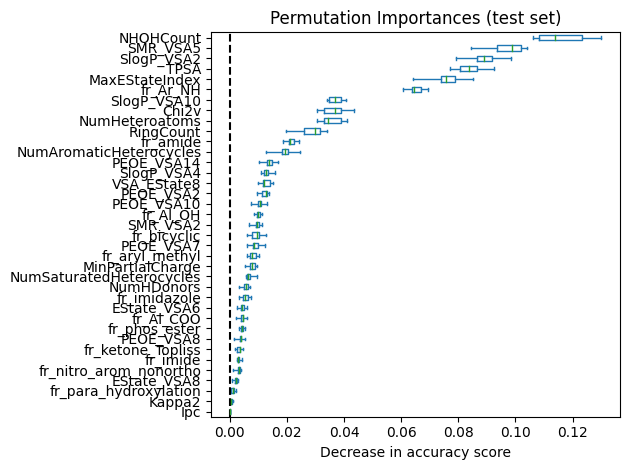

In [50]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_elastic_net, X_train_scaling, y_train, n_repeats=10, random_state=SEED, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [51]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=30,
                           random_state=SEED, scoring = 'r2')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<35}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

NHOHCount                          0.158 +/- 0.019
SMR_VSA5                           0.093 +/- 0.011
TPSA                               0.091 +/- 0.015
SlogP_VSA2                         0.088 +/- 0.013
MaxEStateIndex                     0.077 +/- 0.012
fr_Ar_NH                           0.049 +/- 0.006
NumHeteroatoms                     0.041 +/- 0.007
SMR_VSA2                           0.037 +/- 0.009
NumAromaticHeterocycles            0.030 +/- 0.006
fr_imide                           0.027 +/- 0.002
SlogP_VSA10                        0.025 +/- 0.005
SlogP_VSA4                         0.022 +/- 0.005
fr_amide                           0.021 +/- 0.006
fr_Al_OH                           0.016 +/- 0.004
NumHDonors                         0.016 +/- 0.003
VSA_EState8                        0.015 +/- 0.004
MinPartialCharge                   0.014 +/- 0.004
RingCount                          0.014 +/- 0.006
fr_Al_COO                          0.010 +/- 0.004
fr_aryl_methyl                 

In [52]:
scoring = ['r2']
r_multi = permutation_importance(
    best_elastic_net, X_test_scaling, y_test, n_repeats=30, random_state=SEED, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
            print(f"    {X_train.columns[i]:<35}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    NHOHCount                          0.158 +/- 0.019
    SMR_VSA5                           0.093 +/- 0.011
    TPSA                               0.091 +/- 0.015
    SlogP_VSA2                         0.088 +/- 0.013
    MaxEStateIndex                     0.077 +/- 0.012
    fr_Ar_NH                           0.049 +/- 0.006
    NumHeteroatoms                     0.041 +/- 0.007
    SMR_VSA2                           0.037 +/- 0.009
    NumAromaticHeterocycles            0.030 +/- 0.006
    fr_imide                           0.027 +/- 0.002
    SlogP_VSA10                        0.025 +/- 0.005
    SlogP_VSA4                         0.022 +/- 0.005
    fr_amide                           0.021 +/- 0.006
    fr_Al_OH                           0.016 +/- 0.004
    NumHDonors                         0.016 +/- 0.003
    VSA_EState8                        0.015 +/- 0.004
    MinPartialCharge                   0.014 +/- 0.004
    RingCount                          0.014 +/- 0.006
    fr_

# permutation test (p-value)

In [53]:
# from scipy.stats import norm

# # 순열 검정 수행
# permutation_scores = []
# for _ in range(1000):  # 1000회 순열
#     shuffled_y = np.random.permutation(y_test)
#     score = permutation_importance(best_elastic_net, X_test_scaling, shuffled_y,
#                                    n_repeats = 30, random_state = SEED)
#     permutation_scores.append(score.importances_mean)

# # 귀무가설 하 분포 생성
# null_distribution = np.array(permutation_scores)

In [54]:
# # p-value 계산
# p_values = []
# for i, mean in enumerate(r.importances_mean):
#     # 단측 검정: 귀무가설 하 중요도 > 관측 중요도
#     # p_value = (null_distribution[:, i] >= mean).mean()

#     # 양측 검정: 귀무가설 하 중요도 > 관측 중요도
#     p_value = (null_distribution[:, i] >= mean).mean()
#     p_values.append(p_value)

In [55]:
# df_pvalues = pd.DataFrame()
# col = []
# pval = []
# imp = []

# for i, p in enumerate(p_values):
#     col.append(X_train.columns[i])
#     imp.append(r.importances_mean[i])
#     pval.append(p)

# df_pvalues['Feature'] = col
# df_pvalues['Importance'] = imp
# df_pvalues['p-value'] = pval

# df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
# print(df_pvalues)

In [56]:
# # 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
# df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
# df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False)

# print(df_pvalues_005)

In [57]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

# print(f'# {len(df_pvalues_005)}개')
# print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']))

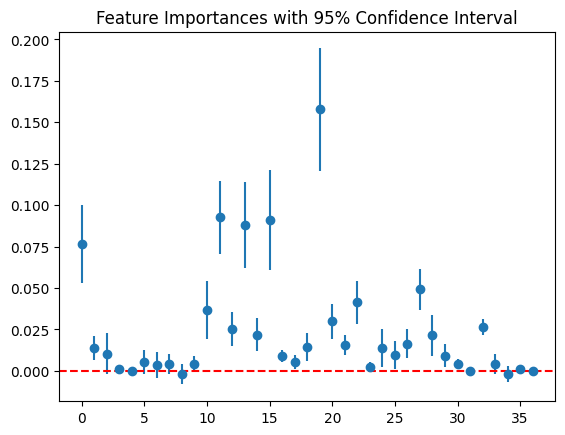

In [58]:
import matplotlib.pyplot as plt

plt.errorbar(range(len(r.importances_mean)), r.importances_mean, 
             yerr=1.96 * r.importances_std, fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Feature Importances with 95% Confidence Interval")
plt.show()


In [59]:
# VIF 검사
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data[vif_data['VIF'] > 5])  # VIF > 5는 다중공선성 문제 가능성


            Variable        VIF
0     MaxEStateIndex  19.945902
1   MinPartialCharge  19.361095
2              Chi2v  18.848937
4             Kappa2   6.628302
7          PEOE_VSA2   5.127134
8          PEOE_VSA7   5.890423
11          SMR_VSA5   6.851502
13        SlogP_VSA2   9.761378
15              TPSA  15.923724
19         NHOHCount  15.682381
21        NumHDonors  18.975157
22    NumHeteroatoms  17.918528
24         RingCount   9.634266


# 예측

In [60]:
y_pred = best_elastic_net.predict(X_test_scaling)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


1.2312872835838227
0.9047503879938127


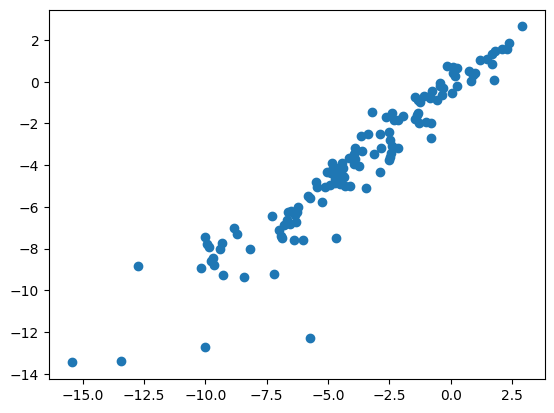

In [62]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.show()

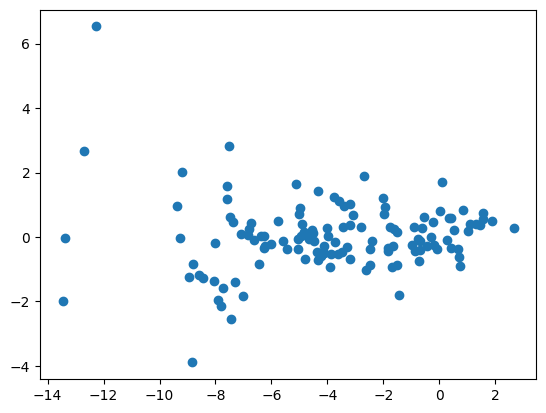

In [63]:
# 잔차 플랏
resid = y_test - y_pred

plt.scatter(y_pred, resid)
plt.show()

In [64]:
# # RFE 실행 (최종적으로 10개의 특성 선택)
# num_features = [3, 5, 7, 10, 20]
# for i in num_features:
#     rfe = RFE(estimator=optimal_elastic_net, n_features_to_select= i)
#     rfe.fit(X_train, y_train)

#     # RFE로 선택된 특성 이름 확인
#     selected_features_indices = rfe.support_
#     selected_features_names = X.columns[selected_features_indices]
#     print("최종 선택된 특성:", list(selected_features_names))

# # # 최종 선택된 특성으로 데이터프레임 생성
# # df_final_selected = ISIS_df[selected_features_names.tolist() + ['target']]
# # print("최종 데이터프레임:")
# # print(df_final_selected.head())

# p-value (부트스트랩 사용 X)

In [65]:
# from sklearn.utils import resample
# from scipy.stats import norm

# best_elastic_net.fit(X_train_scaling, y_train)

# # 원본 계수
# coef = best_elastic_net.coef_

# # 부트스트랩을 통한 유의확률 계산
# n_bootstraps = 1000
# n_features = X_train_scaling.shape[1]
# bootstrap_coefs = np.zeros((n_bootstraps, n_features))

# for i in range(n_bootstraps):
#     # 데이터 재표본화
#     X_resampled, y_resampled = resample(X_train_scaling, y_train, random_state=i)
#     # 재표본화된 데이터로 모델 학습
#     best_elastic_net.fit(X_resampled, y_resampled)
#     bootstrap_coefs[i] = best_elastic_net.coef_

# # 각 계수의 평균 및 표준편차
# coef_mean = np.mean(bootstrap_coefs, axis=0)
# coef_std = np.std(bootstrap_coefs, axis=0)

# # z-값 계산
# z_scores = (coef-coef_mean) / coef_std

# # p-value 계산 (정규분포 가정)
# p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# # 결과 출력
# results = pd.DataFrame({
#     'Feature': [f'Feature_{i}' for i in range(n_features)],
#     'Coefficient': coef,
#     'Std_Error': coef_std,
#     'z_score': z_scores,
#     'p_value': p_values
# })

# print(results)

# # 계수의 신뢰 구간 계산 (95% 신뢰 구간)
# confidence_interval = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)

# # 0을 포함하지 않는 계수는 유의하다고 판단
# significant_coefs = np.where(~((confidence_interval[0] <= 0) & (confidence_interval[1] >= 0)))[0]
# print("Significant coefficients:", significant_coefs)


# t-value (사용 X)

In [66]:
# best_elastic_net.fit(X_train_scaling, y_train)

# # 예측값
# y_pred = best_elastic_net.predict(X_train_scaling)
# coefficients = best_elastic_net.coef_

# # 잔차
# residuals = y_train - y_pred
# # 잔차 제곱합 SSE
# SSE = np.sum(residuals**2)
# # n-p-1
# n_p_1 = len(y_train) - X_train_scaling.shape[1] - 1
# # 잔차의 표준편차 / 오차분산의 불편추정치
# residual_std = np.sqrt(SSE / n_p_1)

# # 표준 오차 계산
# # (X^{T} * X)^{-1}의 대각선 값 추출
# X = np.array(X_train_scaling)
# XtX_inv_diag = np.diag(np.linalg.inv(np.dot(X.T, X)))
# # 표준 오차
# standard_errors = residual_std * np.sqrt(XtX_inv_diag)

# # t-통계량 계산
# t_statistics = best_elastic_net.coef_ / standard_errors

# # elastic 모형
# e_model = pd.DataFrame({'feature' : X_train.columns,
#                         'coef' : coefficients,
#                         't-value' : t_statistics,
#                         'abs(t-value)' : abs(t_statistics)})
# e_model = e_model.sort_values(by='abs(t-value)', ascending = False)
# e_model


In [67]:
# e_model[e_model['abs(t-value)'] > 3].index

In [68]:
# # t-통계량이 3 이상인 변수만 출력
# final_selected_features_index = e_model[e_model['abs(t-value)'] > 3].index

# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(X_train.columns[final_selected_features_index[: i]]))

# print(f'\n#{len(e_model[e_model["abs(t-value)"] > 3].feature)}개')
# print(f'{df_name}_elastic =', list(e_model[e_model['abs(t-value)'] > 3].feature))


# 이건 사용X

In [69]:
# # feature와 계수 매핑
# final_selected_features = pd.DataFrame({'Feature' : X_train.columns,
#                                        'Coefficient' : coefficients})
# # 계수
# final_selected_features = abs(final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index
# final_selected_features_index

# final_selected_features

In [70]:
# final_selected_features_index.size

In [71]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]
# dfs = {}

# for i in num_features:
#     print(f'변수 {i}개: ', list(X_train.columns[final_selected_features_index[: i]]), '\n')
#     dfs[f'df_name_{i}'] = list(X_train.columns[final_selected_features_index[: i]])

In [72]:
# best_elastic_net.coef_.size 

## OLS 적합 (사용 X)

In [73]:
# import statsmodels.api as sm

# X_selected = X_train.iloc[:, best_elastic_net.coef_ != 0]  # 계수가 0이 아닌 변수만 선택
# ols_model = sm.OLS(y_train, X_selected).fit()

# ols_model.summary()

In [74]:
# df_coef = pd.DataFrame({'coef' : ols_model.params,
#                         'pvalue' : ols_model.pvalues,
#                         'abs_coef' : abs(ols_model.params)})
# df_coef = df_coef[df_coef['pvalue'] <= 0.05]
# df_coef = df_coef.sort_values(by = ['pvalue', 'abs_coef'], ascending = [True, False])

# print(list(df_coef.index))
# print(len(list(df_coef.index)))


## permutation importance (사용 X)

In [75]:
# from sklearn.inspection import permutation_importance

# threshold = 0.05

# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)

# importances = result.importances_mean
# sorted_idx = importances.argsort()[::-1]

# threshold_selected_features = X_train.columns[sorted_idx]
# threshold_selected_features = threshold_selected_features[importances[sorted_idx] >  threshold]
# print(list(threshold_selected_features))
# print(threshold_selected_features.size)


In [76]:
# import numpy as np
# from sklearn.inspection import permutation_importance


# # 원래 데이터의 Permutation Importance 계산
# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)
# original_importances = result.importances_mean

# # Null Distribution 생성: 피처를 무작위로 섞은 후 Permutation Importance 계산 반복
# n_permutations = 300
# null_distributions = np.zeros((n_permutations, X_test_scaling.shape[1]))

# for i in range(n_permutations):
#     # 타깃(y) 무작위화
#     y_permuted = np.random.permutation(y_test)
#     perm_result = permutation_importance(best_elastic_net, X_test_scaling, y_permuted, random_state = i)
#     null_distributions[i, :] = perm_result.importances_mean

# # p-value 계산: null 분포에서 original_importances보다 큰 값의 비율
# p_values = np.mean(null_distributions >= original_importances, axis=0)

# # 결과 출력
# feature_names = X_train.columns
# for feature, importance, p_value in zip(feature_names, original_importances, p_values):
#     print(f"Feature: {feature}, Importance: {importance:.4f}, p-value: {p_value:.4f}")

# # 유의한 피처 선택
# alpha = 0.05  # 유의 수준
# significant_features = feature_names[p_values <= alpha]
# print(f"Significant features (p < {alpha}): {list(significant_features)}")
